# Platemaps in matplotlib

Got these down in R/ggplot2, though it would be nice to use python, and so have to figure out how to make them in matplotlib.


In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
import seaborn as sns
import string
%matplotlib inline
plt.style.use(["seaborn-ticks", "seaborn-notebook"])

### From a matrix (platemap layout)

/home/scott/.local/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


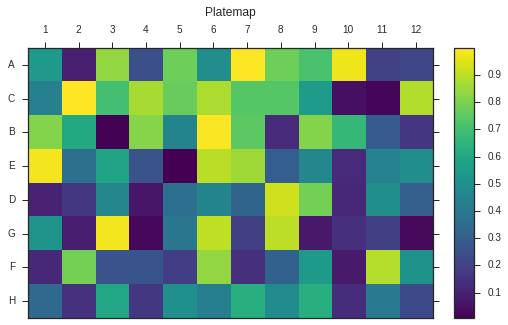

In [2]:
# create 96-well data from random numbers
mat = np.random.random((8, 12))

fig = plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)

heatmap = ax.imshow(mat,
                    interpolation="nearest",
                    cmap=plt.cm.viridis)
# move xaxis labels to top of plate
ax.xaxis.set_ticks_position('top') 

# create tick labels
x_ticks = np.arange(1, mat.shape[1]+1)
y_ticks = set(string.uppercase[:mat.shape[0]])

# add tick labels
ax.xaxis.set_ticks(np.arange(mat.shape[1]))
ax.xaxis.set_ticklabels(x_ticks)
ax.yaxis.set_ticks(np.arange(mat.shape[0]))
ax.yaxis.set_ticklabels(y_ticks)
ax.set_title("Platemap", y=1.10)

# sort out colorbar position and size
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)
fig.colorbar(heatmap, cax=cax)

fig.show()

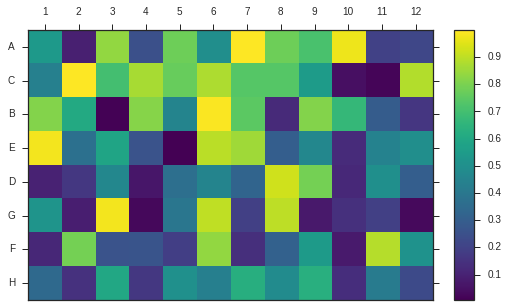

In [3]:
# make into a function that takes a matrix as input

def plot_platemap(mat,cm = plt.cm.viridis, title = ""):
    
    fig = plt.figure(figsize=[8,5])
    ax = fig.add_subplot(111)

    heatmap = ax.imshow(mat,
                        interpolation="nearest",
                        cmap=cm)
    # move xaxis labels to top of plate
    ax.xaxis.set_ticks_position('top') 

    # create tick labels
    x_ticks = np.arange(1, mat.shape[1]+1)
    y_ticks = set(string.uppercase[:mat.shape[0]])

    # add tick labels
    ax.xaxis.set_ticks(np.arange(mat.shape[1]))
    ax.xaxis.set_ticklabels(x_ticks)
    ax.yaxis.set_ticks(np.arange(mat.shape[0]))
    ax.yaxis.set_ticklabels(y_ticks)
    ax.set_title(title, y=1.10)

    # sort out colorbar position and size
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.3)
    fig.colorbar(heatmap, cax=cax)

plot_platemap(mat)

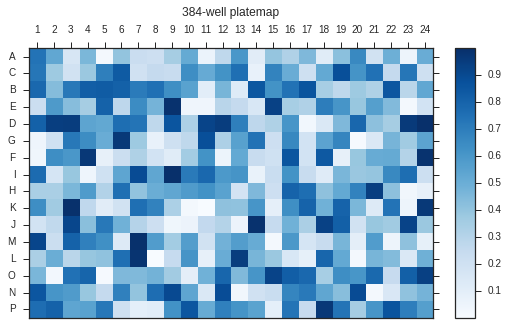

In [4]:
mat384 = np.random.random((16,24))
plot_platemap(mat384, cm = plt.cm.Blues, title = "384-well platemap")

## From a well-label dataframe

Ideally want to pass a dataframe with a column of well labels (A01) and values to a function that produces a platemap, or multiple platemaps for multiple plates (if a column for plate identifiers is present).

In [5]:
def char_to_int(x):
    return ord(x.lower()) - 96


def well_to_xy(well):
    """
    converts alphanumerical well label to x-y co-ordinates for plotting on a grid
    returns tuple of x,y co-ordinate
    """
    return (char_to_int(well[0])-1, int(well[1:])-1)
    

well_to_xy("A01")

(0, 0)

Could convert to matrix, since we have the x,y co-ordinate for each point. Should handle missing data fine if I pre-allocate the matrix as `np.nan`.


In [6]:
import numpy as np

mat = np.empty((12, 8), dtype=float)

mat[:] = np.nan

mat[(1,1)] = 2

mat

array([[ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,   2.,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan]])

### Make example well labels and data

In [7]:
wells = [string.letters[i] + str(j) for i in range(0, 8) for j in range(1, 13)]
vals = np.random.random(96)

In [8]:
df = pd.DataFrame(list(zip(wells, vals)), columns=["well", "val"])
df.head()

,well,val
0,A1,0.311342
1,A2,0.337581
2,A3,0.832166
3,A4,0.078765
4,A5,0.020682


In [9]:
df["coords"] = [well_to_xy(well) for well in df.well]

In [10]:
df.head()

,well,val,coords
0,A1,0.311342,"(0, 0)"
1,A2,0.337581,"(0, 1)"
2,A3,0.832166,"(0, 2)"
3,A4,0.078765,"(0, 3)"
4,A5,0.020682,"(0, 4)"


In [11]:
# create matrix and popular vals from coords

mat = np.empty((8,12))
mat[:] = np.nan

for i in df.iterrows():
    mat[i[1][2]] = i[1][1]
    
mat

array([[ 0.31134211,  0.33758075,  0.83216622,  0.07876536,  0.02068218,
         0.44109364,  0.01583548,  0.11404942,  0.26293337,  0.16745407,
         0.0857926 ,  0.25503642],
       [ 0.70935162,  0.44851441,  0.40494743,  0.89718482,  0.10565718,
         0.19035363,  0.81467643,  0.0146094 ,  0.9190544 ,  0.04106038,
         0.53108457,  0.01932651],
       [ 0.43120866,  0.47511428,  0.54055993,  0.42360119,  0.84653049,
         0.18419594,  0.43064806,  0.82852861,  0.4485804 ,  0.04124278,
         0.61601978,  0.22699731],
       [ 0.42025644,  0.94952924,  0.91150478,  0.33008055,  0.46020209,
         0.4163185 ,  0.95677921,  0.77863555,  0.85830021,  0.47324019,
         0.16687468,  0.55089419],
       [ 0.54036766,  0.28184072,  0.54473517,  0.10405663,  0.95558409,
         0.64799332,  0.17659945,  0.94601992,  0.00430993,  0.92729713,
         0.17214722,  0.03647026],
       [ 0.27089005,  0.47684658,  0.48434602,  0.94616955,  0.27311409,
         0.84895732,  

In [12]:
def plot_platemap(mat,cm, title):
    fig = plt.figure(figsize=[8,5])
    ax = fig.add_subplot(111)
    heatmap = ax.imshow(mat,
                        interpolation="nearest",
                        cmap=cm)
    # move xaxis labels to top of plate
    ax.xaxis.set_ticks_position('top') 
    # create tick labels
    x_ticks = np.arange(1, mat.shape[1]+1)
    y_ticks = set(string.uppercase[:mat.shape[0]])
    # add tick labels
    ax.xaxis.set_ticks(np.arange(mat.shape[1]))
    ax.xaxis.set_ticklabels(x_ticks)
    ax.yaxis.set_ticks(np.arange(mat.shape[0]))
    ax.yaxis.set_ticklabels(y_ticks)
    ax.set_title(title, y=1.10)
    # sort out colorbar position and size
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.3)
    fig.colorbar(heatmap, cax=cax)



def char_to_int(x):
    return ord(x.lower()) - 96


def well_to_xy(well):
    return (char_to_int(well[0])-1, int(well[1:])-1)


def platemap(well, vals, cm=plt.cm.viridis, plate=96, title="platemap"):
    coords = [well_to_xy(i) for i in wells]
    tmp = zip(coords, vals)
    if plate == 96:
        size = (8, 12)
    elif plate == 384:
        size = (16, 24)
    else:
        raise ValueError("Unknown plate")
    # create empty matrix of nans
    mat = np.empty(size)
    mat[:] = np.nan
    for i in tmp:
        mat[i[0]] = i[1]
    plot_platemap(mat, cm=cm, title=title)

    


  well       val  coords
0   A1  0.311342  (0, 0)
1   A2  0.337581  (0, 1)
2   A3  0.832166  (0, 2)
3   A4  0.078765  (0, 3)
4   A5  0.020682  (0, 4)


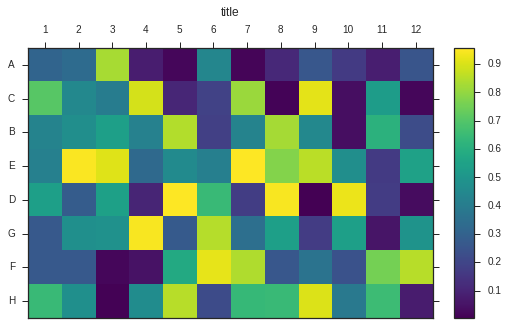

In [13]:
print df.head()
platemap(df.well, df.val, title="title")